In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from keras.datasets import fashion_mnist
from numpy.random.mtrand import RandomState
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

sns.set()
# sns.set_style("whitegrid")

In [2]:
noise_scores_filename_list = [
    "autokeras_noise_time_limit_mins_90.pkl",
    "autokeras_aug_gpu_noise_time_limit_mins_90.pkl",
    "autokeras_gpu_noise_time_limit_mins_90.pkl",
    "h2o_noise_time_limit_mins_90.pkl",
    "tpot_noise_time_limit_mins_90.pkl",
]

noise_scores_df = None
for scores_filename in noise_scores_filename_list:
    df = pd.read_pickle("scores_fashion_noise/" + scores_filename)
    noise_scores_df = pd.concat([noise_scores_df, df], axis=0)
noise_scores_df = noise_scores_df[noise_scores_df["train_std"] == 0].reset_index(drop=True)
print(noise_scores_df)

           model_name  train_std  test_std  accuracy
0           autokeras        0.0       0.0     0.887
1           autokeras        0.0      51.0     0.597
2           autokeras        0.0     102.0     0.152
3           autokeras        0.0     153.0     0.122
4           autokeras        0.0     204.0     0.120
5           autokeras        0.0     255.0     0.115
6   autokeras_aug_gpu        0.0       0.0     0.922
7   autokeras_aug_gpu        0.0      51.0     0.148
8   autokeras_aug_gpu        0.0     102.0     0.125
9   autokeras_aug_gpu        0.0     153.0     0.109
10  autokeras_aug_gpu        0.0     204.0     0.102
11  autokeras_aug_gpu        0.0     255.0     0.099
12      autokeras_gpu        0.0       0.0     0.909
13      autokeras_gpu        0.0      51.0     0.672
14      autokeras_gpu        0.0     102.0     0.273
15      autokeras_gpu        0.0     153.0     0.216
16      autokeras_gpu        0.0     204.0     0.164
17      autokeras_gpu        0.0     255.0    

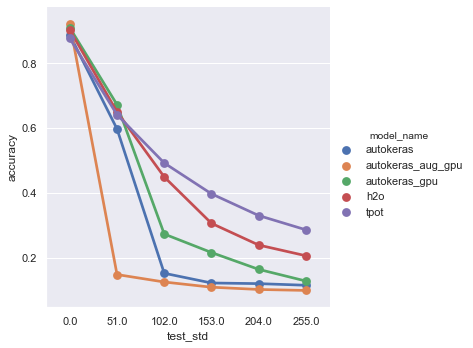

In [3]:
sns.catplot(x="test_std", y="accuracy", hue="model_name", kind="point", data=noise_scores_df)
plt.show()

In [12]:
rotation_scores_filename_list = [
    "autokeras_rotation_time_limit_mins_90.pkl",
    "autokeras_aug_gpu_rotation_time_limit_mins_90.pkl",
    "autokeras_gpu_rotation_time_limit_mins_90.pkl",
    "h2o_rotation_time_limit_mins_90.pkl",
    "tpot_rotation_time_limit_mins_90.pkl",
]

dirname = "scores_fashion_rotation"
err_param_name = "max_angle"
rotation_scores_df = None
for scores_filename in rotation_scores_filename_list:
    df = pd.read_pickle(dirname + "/" + scores_filename)
    alt_path = dirname + "_alt/" + scores_filename
    if Path(alt_path).is_file():
        print(alt_path)
        df_alt = pd.read_pickle(alt_path)
        df_mean = pd.concat([df, df_alt], axis=0)
        print(df.groupby("test_" + err_param_name)["accuracy"].mean())
    rotation_scores_df = pd.concat([rotation_scores_df, df], axis=0)
rotation_scores_df = rotation_scores_df[rotation_scores_df["train_max_angle"] == 0].reset_index(drop=True)
print(rotation_scores_df)

scores_fashion_rotation_alt/autokeras_rotation_time_limit_mins_90.pkl
test_max_angle
0.0      0.791333
36.0     0.731500
72.0     0.652167
108.0    0.577667
144.0    0.529333
180.0    0.504333
Name: accuracy, dtype: float64
scores_fashion_rotation_alt/autokeras_aug_gpu_rotation_time_limit_mins_90.pkl
test_max_angle
0.0      0.874000
36.0     0.814167
72.0     0.741667
108.0    0.678167
144.0    0.629000
180.0    0.595333
Name: accuracy, dtype: float64
scores_fashion_rotation_alt/autokeras_gpu_rotation_time_limit_mins_90.pkl
test_max_angle
0.0      0.862333
36.0     0.797167
72.0     0.719333
108.0    0.647500
144.0    0.587833
180.0    0.548833
Name: accuracy, dtype: float64
           model_name  train_max_angle  test_max_angle  accuracy
0           autokeras              0.0             0.0     0.887
1           autokeras              0.0            36.0     0.578
2           autokeras              0.0            72.0     0.370
3           autokeras              0.0           108.0  

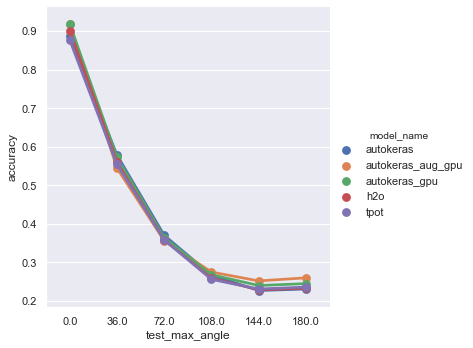

In [8]:

sns.catplot(x="test_max_angle", y="accuracy", hue="model_name", kind="point", data=rotation_scores_df, )
plt.show()